In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ineraction_table = pd.read_csv('20241116_Pratibha_IPs_DDA_MQ_matchBwRuns_LFQ_psdct200Kto600K_log2_MScountAvg5_noImp_volcano_plots_LESSstringent_interactors_list_CtrHitsSubt_noAltIPsubt.txt', sep='\t')

In [3]:
ineraction_table['-log10pval'] = -np.log10(ineraction_table['pval'])

In [4]:
ineraction_table[ineraction_table['bait']=='V5_RNPS1_noR']['fcSig'].value_counts()

fcSig
pval < 0.05  and  log2FC > 1      236
Name: count, dtype: int64

In [5]:
ineraction_table[ineraction_table['bait']=='V5_RNPS1_R']['fcSig'].value_counts()

fcSig
pval < 0.1  and  log2FC > 1      116
Name: count, dtype: int64

In [6]:
ineraction_table[ineraction_table['bait']=='V5_GRB2_noR']['fcSig'].value_counts()

fcSig
pval < 0.05  and  log2FC > 1      220
Name: count, dtype: int64

In [7]:
ineraction_table[ineraction_table['bait']=='V5_GRB2_R']['fcSig'].value_counts()

fcSig
pval < 0.1  and  log2FC > 1      69
Name: count, dtype: int64

In [8]:
ineraction_table[(ineraction_table['bait']=='V5_GRB2_noR') & (ineraction_table['genes']=='GRB2')]


log2FC genes      pval                           fcSig         bait  \
475  1.597158  GRB2  0.006457  pval < 0.05  and  log2FC > 1    V5_GRB2_noR   

     -log10pval  
475    2.189968

In [9]:
-np.log10(0.006457)

2.1899692135941606

In [10]:
sig_genes = {}
for b in set(ineraction_table['bait']):
    sig_genes[b] = set(ineraction_table[ineraction_table['bait']==b]['genes'])

In [11]:
ineraction_table_full = pd.read_csv('20241119_Pratibha_IPs_DDA_MQ_matchBwRuns_LFQ_psdct200Kto600K_log2_MScountAvg5_noImp_comparisons_tTest_AllProteins_pval.txt', sep='\t')

In [12]:
full_tables = {}
for b in set(ineraction_table['bait']):
    full_tables[b] = ineraction_table_full[ineraction_table_full['Comparison'].str.contains('V5_RNPS1_noR')]
    full_tables[b]['sig'] = full_tables[b]['Gene'].isin(sig_genes[b])
    full_tables[b]['-log10pval'] = -np.log10(full_tables[b]['pval'])

/tmp/ipykernel_2375916/4063302819.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_tables[b]['sig'] = full_tables[b]['Gene'].isin(sig_genes[b])
/tmp/ipykernel_2375916/4063302819.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_tables[b]['-log10pval'] = -np.log10(full_tables[b]['pval'])
/tmp/ipykernel_2375916/4063302819.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [13]:
full_tables['V5_RNPS1_noR']

Comparison  \
0     V5_RNPS1_noR/IgG_RNPS1_noR   
1     V5_RNPS1_noR/IgG_RNPS1_noR   
2     V5_RNPS1_noR/IgG_RNPS1_noR   
3     V5_RNPS1_noR/IgG_RNPS1_noR   
4     V5_RNPS1_noR/IgG_RNPS1_noR   
...                          ...   
3265    V5_GRB2_noR/V5_RNPS1_noR   
3266    V5_GRB2_noR/V5_RNPS1_noR   
3267    V5_GRB2_noR/V5_RNPS1_noR   
3268    V5_GRB2_noR/V5_RNPS1_noR   
3269    V5_GRB2_noR/V5_RNPS1_noR   

                                                   Gene    log2FC      pval  \
0                                                  RPS9  2.863816  0.010517   
1                                                 KHSRP  3.166381  0.004943   
2                                               HNRNPDL  1.578380  0.040889   
3                                                  CLTC -4.430833  0.133654   
4                                                SRCIN1 -3.030104  0.000118   
...                                                 ...       ...       ...   
3265                                              WDR18  1.271584  0.302443   
3266  HIST1H2BN;HIST1H2BL;HIST1H2BM;HIST1H2BH;HIST2H...  1.462914  0.045585   
3267                                              RPL10  0.014154  0.947692   
3268                                              CHTOP -1.100483  0.005838   
3269                                              SAP18 -2.883889  0.052868   

        sig  -log10pval  
0      True    1.978111  
1      True    2.306020  
2      True    1.388398  
3     False    0.874017  
4     False    3.928298  
...     ...         ...  
3265  False    0.519356  
3266  False    1.341178  
3267  False    0.023333  
3268   True    2.233703  
3269   True    1.276809  

[1308 rows x 6 columns]

In [14]:
RNPS1_list = ['RNPS1','PTBP1', 
              'SRRM1', 'NUDT21', 
              'CPSF4', 'PABPC1', 
              'EIF4A3', 'CSTF1', 
              'CPSF1', 'CPSF6',
              'FIP1L1','PABPN1',
              'CPSF7','CPSF2',
              'CPSF3','ACIN1','RBBP6']

In [15]:
GRB2_list = ['GRB2', 'NUDT21','PABPC1','GAB1','CPSF6','CPSF7','SOS1','SOS2']

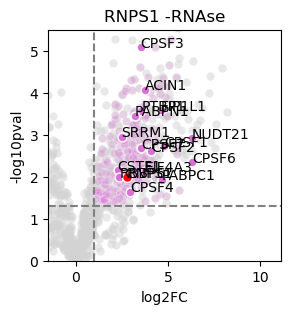

In [17]:
plt.rcParams['figure.figsize'] = [3, 3]

sns.scatterplot(data = full_tables['V5_RNPS1_noR'], x='log2FC', y='-log10pval', color='lightgrey', linewidth=0, alpha=0.5)
sns.scatterplot(data = ineraction_table[(ineraction_table['bait']=='V5_RNPS1_noR') & (ineraction_table['log2FC']>1) &
                (ineraction_table['pval']<0.05)]
                , x='log2FC', y='-log10pval', color='orchid',
               linewidth=1, edgecolor='white',alpha=0.2)
sns.scatterplot(data = ineraction_table[(ineraction_table['bait']=='V5_RNPS1_noR') & (ineraction_table['log2FC']>1) &
                (ineraction_table['pval']<0.05) & (ineraction_table['genes'].isin(RNPS1_list))]
                , x='log2FC', y='-log10pval', color='orchid',
               linewidth=1, edgecolor='white',s=40)
sns.scatterplot(data = ineraction_table[(ineraction_table['bait']=='V5_RNPS1_noR') & (ineraction_table['log2FC']>1) &
                (ineraction_table['pval']<0.05) & (ineraction_table['genes']=='RNPS1')]
                , x='log2FC', y='-log10pval', color='red',
               linewidth=1, edgecolor='white',s=50)

plt.axvline(x=1, linestyle='dashed', color='grey')
plt.axhline(-np.log10(0.05), linestyle='dashed', color='grey')
for index, row in ineraction_table[(ineraction_table['bait']=='V5_RNPS1_noR') & (ineraction_table['log2FC']>1) &(ineraction_table['pval']<0.05)].iterrows():
    if row['genes'] in RNPS1_list:
        plt.text(row['log2FC'], row['-log10pval'], row['genes'])

plt.ylim(-0,5.5)
plt.xlim(-1.5)
plt.title('RNPS1 -RNAse')
plt.savefig('./figures/RNPS1_noRNAse_scatter.png')
plt.savefig('./figures/RNPS1_noRNAse_scatter.svg')
plt.savefig('./figures/RNPS1_noRNAse_scatter.jpg')

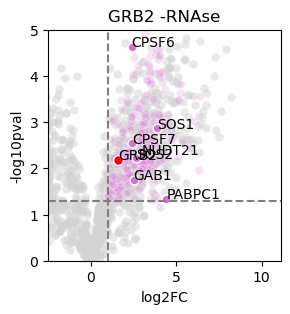

In [23]:
plt.rcParams['figure.figsize'] = [3, 3]

sns.scatterplot(data = full_tables['V5_GRB2_noR'], x='log2FC', y='-log10pval', color='lightgrey', linewidth=0, alpha=0.5)
sns.scatterplot(data = ineraction_table[(ineraction_table['bait']=='V5_GRB2_noR') & (ineraction_table['log2FC']>1) &
                (ineraction_table['pval']<0.05)]
                , x='log2FC', y='-log10pval', color='orchid',
               linewidth=1, edgecolor='white',alpha=0.2)
sns.scatterplot(data = ineraction_table[(ineraction_table['bait']=='V5_GRB2_noR') & (ineraction_table['log2FC']>1) &
                (ineraction_table['pval']<0.05) & (ineraction_table['genes'].isin(GRB2_list))]
                , x='log2FC', y='-log10pval', color='orchid',s=40,
               linewidth=1, edgecolor='white')
sns.scatterplot(data = ineraction_table[(ineraction_table['bait']=='V5_GRB2_noR') & (ineraction_table['log2FC']>1) &
                (ineraction_table['pval']<0.05) & (ineraction_table['genes']=='GRB2')]
                , x='log2FC', y='-log10pval', color='red',
               linewidth=1, edgecolor='white',s=50)

plt.axvline(x=1, linestyle='dashed', color='grey')
plt.axhline(-np.log10(0.05), linestyle='dashed', color='grey')
for index, row in ineraction_table[(ineraction_table['bait']=='V5_GRB2_noR') & (ineraction_table['log2FC']>1) &(ineraction_table['pval']<0.05)].iterrows():
    if row['genes'] in GRB2_list:
        plt.text(row['log2FC'], row['-log10pval'], row['genes'])
plt.ylim(-0,5)
plt.xlim(-2.5)
plt.title('GRB2 -RNAse')
plt.savefig('./figures/GRB2_noRNAse_scatter.png')
plt.savefig('./figures/GRB2_noRNAse_scatter.svg')
plt.savefig('./figures/GRB2_noRNAse_scatter.jpg')